<a href="https://colab.research.google.com/github/FathimaNazarudeen/TSA/blob/main/Assignment%202/MA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

!pip -q install yfinance
import yfinance as yf

In [47]:
import pandas as pd


In [48]:
IBEX = yf.Ticker("^IBEX")

IBEX_values = IBEX.history(start="2020-06-01")

In [49]:
IBEX_values

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-01,7228.700195,7276.000000,7160.100098,7221.399902,291929600,0,0
2020-06-02,7264.000000,7445.299805,7236.899902,7408.100098,402947100,0,0
2020-06-03,7487.299805,7629.700195,7448.899902,7626.399902,445036400,0,0
2020-06-04,7567.700195,7669.200195,7516.000000,7566.799805,514858000,0,0
2020-06-05,7672.000000,7890.399902,7664.100098,7872.600098,573283900,0,0
...,...,...,...,...,...,...,...
2022-05-30,8975.599609,8992.700195,8905.599609,8930.799805,159281100,0,0
2022-05-31,8898.799805,8922.799805,8836.900391,8851.500000,314821900,0,0
2022-06-01,8881.299805,8909.299805,8736.700195,8747.200195,163198400,0,0


In [50]:
import matplotlib.pyplot as plt


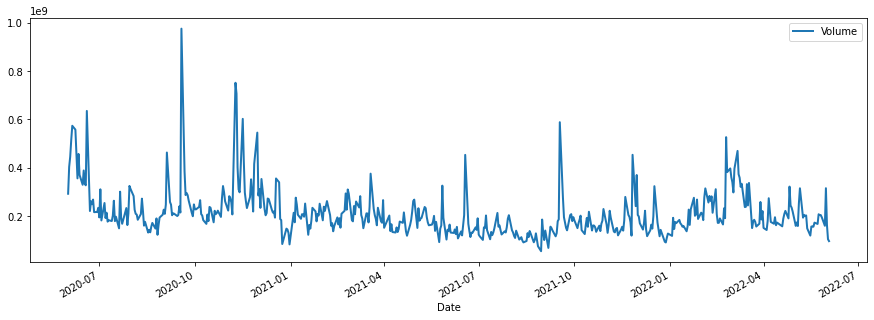

In [51]:
IBEX_values[['Volume']].plot(lw=2);

In [52]:
from statsmodels.tsa.stattools import adfuller
series = IBEX_values[["Volume"]].squeeze()
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.848308
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [53]:
result[1]

3.639305229148475e-07

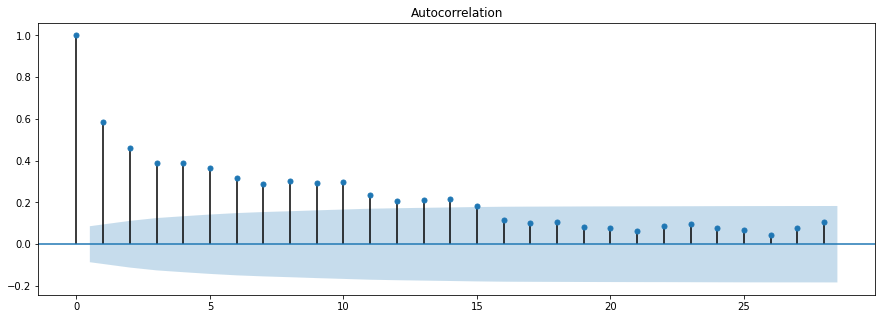

In [54]:
from statsmodels.graphics.tsaplots import plot_acf


plot_acf(series)
plt.show()

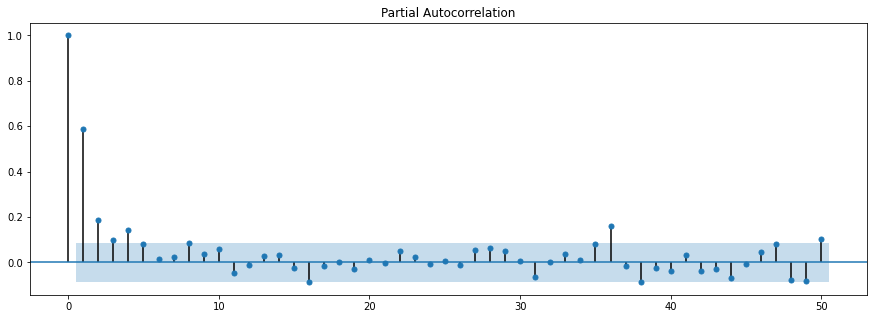

In [55]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, lags=50)
plt.show()

In [56]:
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
series
from statsmodels.tsa.arima_model import ARIMA
ARMA_model = ARIMA(endog=series, order=(0, 0, 15))
results = ARMA_model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                 Volume   No. Observations:                  517
Model:                    ARMA(0, 15)   Log Likelihood              -10106.156
Method:                       css-mle   S.D. of innovations       74619222.451
Date:                Sun, 05 Jun 2022   AIC                          20246.311
Time:                        18:24:40   BIC                          20318.528
Sample:                             0   HQIC                         20274.608
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.112e+08   1.18e+07     17.955      0.000    1.88e+08    2.34e+08
ma.L1.Volume      0.4138      0.044      9.433      0.000       0.328       0.500
ma.L2.Volume      0.2821      0.048     

In [57]:
pred=[]
pred = results.predict(0,517)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [58]:
pred

0      2.111851e+08
1      2.553387e+08
2      3.120502e+08
3      3.461761e+08
4      3.837585e+08
           ...     
513    1.828102e+08
514    2.419113e+08
515    1.933265e+08
516    1.548688e+08
517    1.620923e+08
Length: 518, dtype: float64

In [59]:
series

Date
2020-06-01    291929600
2020-06-02    402947100
2020-06-03    445036400
2020-06-04    514858000
2020-06-05    573283900
                ...    
2022-05-30    159281100
2022-05-31    314821900
2022-06-01    163198400
2022-06-02    103691200
2022-06-03     95868700
Name: Volume, Length: 517, dtype: int64

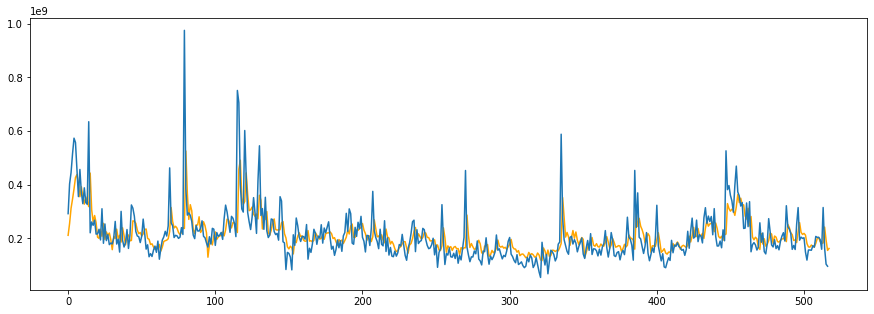

In [60]:
k=[j for j in pred]
plt.plot(k,color="orange")

p=[i for i in series]
plt.plot(p)
plt.show()

In [61]:
ARMA_model = ARIMA(endog=series[:500], order=(0, 0, 20))
results = ARMA_model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                 Volume   No. Observations:                  500
Model:                    ARMA(0, 20)   Log Likelihood               -9775.310
Method:                       css-mle   S.D. of innovations       74819755.681
Date:                Sun, 05 Jun 2022   AIC                          19594.620
Time:                        18:27:36   BIC                          19687.342
Sample:                             0   HQIC                         19631.004
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.125e+08   1.43e+07     14.913      0.000    1.85e+08     2.4e+08
ma.L1.Volume      0.4084      0.045      9.116      0.000       0.321       0.496
ma.L2.Volume      0.2754      0.049     

In [62]:
series

Date
2020-06-01    291929600
2020-06-02    402947100
2020-06-03    445036400
2020-06-04    514858000
2020-06-05    573283900
                ...    
2022-05-30    159281100
2022-05-31    314821900
2022-06-01    163198400
2022-06-02    103691200
2022-06-03     95868700
Name: Volume, Length: 517, dtype: int64

In [63]:
pred = results.predict(0,517)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


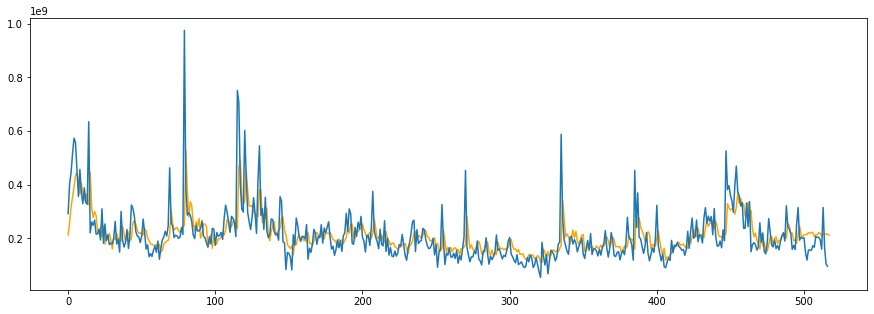

In [64]:
k=[j for j in pred]
plt.plot(k,color="orange")

p=[i for i in series]
plt.plot(p)
plt.show()

In [65]:

from sklearn.metrics import mean_squared_error
  


MSE = np.square(np.subtract(series[:500],pred[:500])).mean()


In [66]:
data2=pd.read_csv("/content/Electric_Production.csv")


In [67]:
data2

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
...,...,...
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212


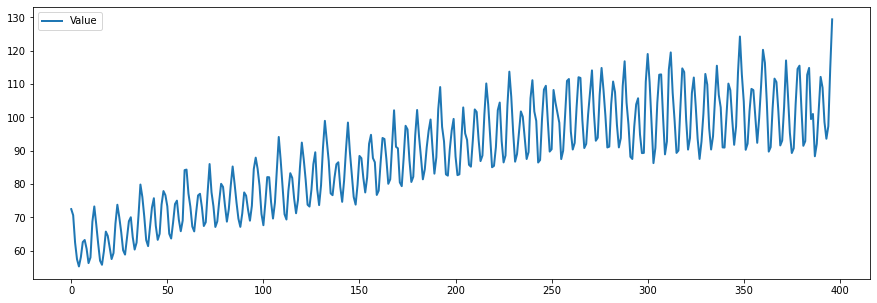

In [68]:
data2[['Value']].plot(lw=2);

In [69]:
series2 = data2[["Value"]].squeeze()
X = series2.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.256990
p-value: 0.186215
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


In [70]:
series2

0       72.5052
1       70.6720
2       62.4502
3       57.4714
4       55.3151
         ...   
392     98.6154
393     93.6137
394     97.3359
395    114.7212
396    129.4048
Name: Value, Length: 397, dtype: float64

In [71]:
diff=series2.diff(1).fillna(0)

In [72]:
diff

0       0.0000
1      -1.8332
2      -8.2218
3      -4.9788
4      -2.1563
        ...   
392   -10.3158
393    -5.0017
394     3.7222
395    17.3853
396    14.6836
Name: Value, Length: 397, dtype: float64

In [73]:
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.085381
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


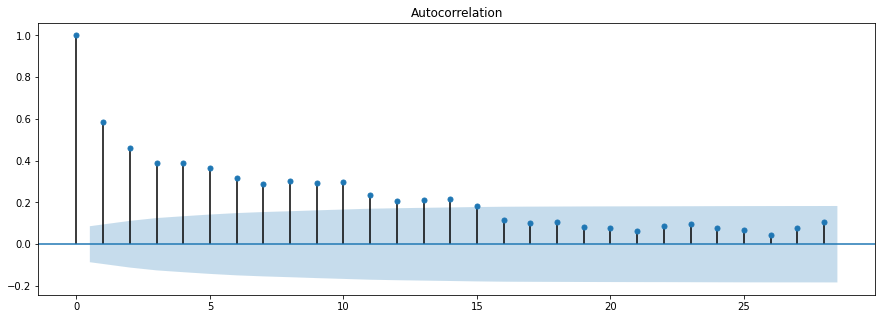

In [74]:
plot_acf(series)
plt.show()

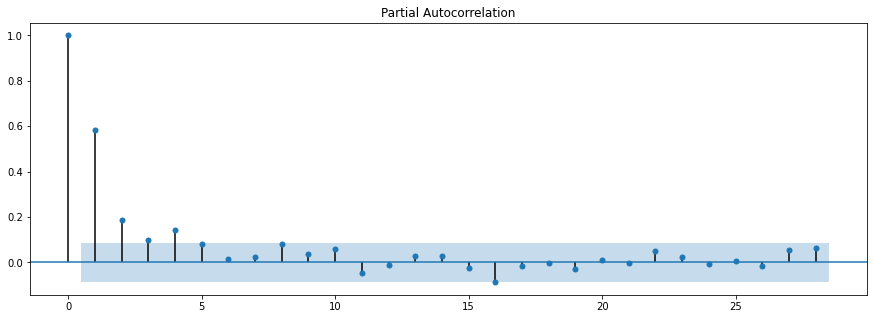

In [75]:
plot_pacf(series)
plt.show()

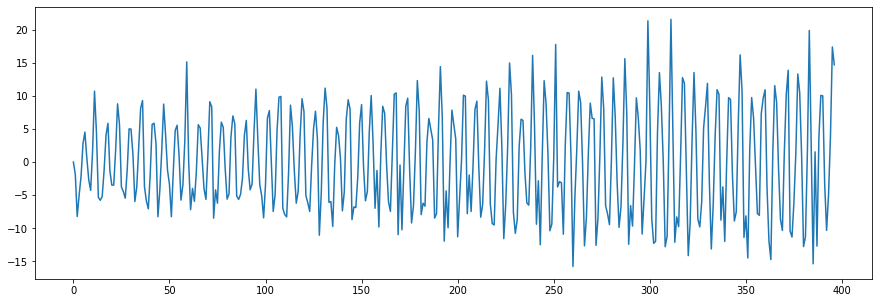

In [76]:
plt.plot(diff)
plt.show()

In [77]:
ARMA_model = ARIMA(endog=diff, order=(0, 0, 3))
results = ARMA_model.fit()
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                  397
Model:                     ARMA(0, 3)   Log Likelihood               -1222.622
Method:                       css-mle   S.D. of innovations              5.246
Date:                Sun, 05 Jun 2022   AIC                           2455.245
Time:                        18:30:55   BIC                           2475.164
Sample:                             0   HQIC                          2463.135
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1101      0.020      5.631      0.000       0.072       0.148
ma.L1.Value     0.1133      0.038      2.979      0.003       0.039       0.188
ma.L2.Value    -0.5018      0.042    -11.984    

In [78]:
pred = results.predict(0,203)

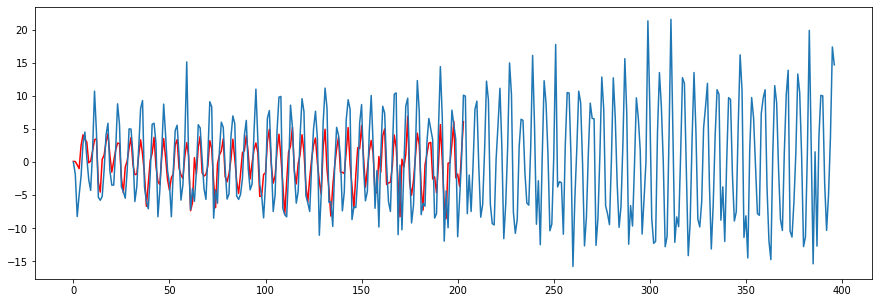

In [79]:

plt.plot(pred,color="red")
plt.plot(diff)
plt.show()